# Implemented by:


>> ### `Bilal Ahmad Butt`
>> * 23072530
>>
>> * bilal.ahmad.butt@fau.de
>> * Personal email: bilal.ahmad125@yahoo.com

## Step 0: Import all the necessary dependencies

In [1]:
import sys
import importlib
sys.path.append('../')

from IPython.display import display, Math, Latex

# From data_preparation classes
from src.finance_ml.data_preparation.data_preparation import DataLoader

from src.finance_ml.indicators.indicators import Indicators

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_ta as pta
import copy


## Step 1: Reading the datafile

In [4]:
# Defining time_index_col (must be the same column in all inputs) and keep_cols refering to the columns that will remain in the dataset
dataloader = DataLoader(time_index_col= 'DATE', keep_cols = ['VOLUME','OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW','TRANSACTIONS'])

Here we will select $N=10,000$ ticks from our database for simplicity. We also select the equity $\textbf{USDEUR}$ from  the data available.

In [5]:
fname_USDEUR = 'FX/USDEUR_2020-04-07_2022-04-06.parquet'
fname_AAPL = 'equities/AAPL_2020-04-07_2022-04-06.parquet'

# No. of Records from example dataset
N = 10000

In [6]:
# Dataset chosen in this simulation
ticker = 'Apple'
fname = fname_USDEUR

In [7]:
# loading assets into to an unique df
original_data = dataloader.load_dataset({ticker:'../data/'+fname}).iloc[:N]
display(original_data)
# df

,Apple_VOLUME,Apple_OPEN,Apple_HIGHT,Apple_LOW,Apple_CLOSE,Apple_VW,Apple_TRANSACTIONS
DATE,,,,,,,
2020-04-07 18:58:00,4,0.91805,0.91810,0.91803,0.91810,0.9181,4
2020-04-07 18:59:00,4,0.91802,0.91805,0.91802,0.91805,0.9180,4
2020-04-07 19:00:00,4,0.91806,0.91806,0.91799,0.91800,0.9180,4
2020-04-07 19:01:00,3,0.91799,0.91800,0.91797,0.91797,0.9180,3
2020-04-07 19:02:00,4,0.91797,0.91797,0.91778,0.91778,0.9179,4
...,...,...,...,...,...,...,...
2020-04-16 20:57:00,4,0.92042,0.92042,0.92020,0.92040,0.9204,4
2020-04-16 20:58:00,4,0.92040,0.92051,0.92040,0.92051,0.9204,4
2020-04-16 20:59:00,4,0.92030,0.92059,0.92030,0.92052,0.9205,4


## Step 2: Configure the columns of dataframe

In [10]:
data_cols = ['OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW', 'VOLUME','ADI','TRANSACTIONS']

# For each of calculated column, we add the ticker code, as standardized by class 𝙳𝚊𝚝𝚊𝙻𝚘𝚊𝚍𝚎𝚛
data_cols = [ticker+'_'+col for col in data_cols]
norm_cols = [col + '_norm' for col in data_cols]
data_cols

['Apple_OPEN',
 'Apple_HIGHT',
 'Apple_LOW',
 'Apple_CLOSE',
 'Apple_VW',
 'Apple_VOLUME',
 'Apple_ADI',
 'Apple_TRANSACTIONS']

## Step 3: Calculate Indicators

### Step 3.1: calculate all the Moving averages using window size = 23

In [12]:
# Create copy of original data

df_win23 = copy.deepcopy(original_data)

In [13]:
# Process data normalization
norm_data = False

# Select Indicator transformer
indicator = Indicators(ticker=ticker, norm_data=norm_data, calc_all=False, SMA_win=23, EMA_win=23, WMA_win=23, HMA_win=23, list_ind=['SMA','EMA','WMA', 'HMA'])

# Calculate Indicators over input dataframe
df_win23 = indicator.fit_transform(df_win23)

In [14]:
# Display the output
# Note: At this stage the output will have NaN values.
df_win23

,Apple_VOLUME,Apple_OPEN,Apple_HIGHT,Apple_LOW,Apple_CLOSE,Apple_VW,Apple_TRANSACTIONS,Apple_EMA_w23,Apple_SMA_w23,Apple_WMA_w23,Apple_HMA_w23
DATE,,,,,,,,,,,
2020-04-07 18:58:00,4,0.91805,0.91810,0.91803,0.91810,0.9181,4,NaN,NaN,NaN,NaN
2020-04-07 18:59:00,4,0.91802,0.91805,0.91802,0.91805,0.9180,4,NaN,NaN,NaN,NaN
2020-04-07 19:00:00,4,0.91806,0.91806,0.91799,0.91800,0.9180,4,NaN,NaN,NaN,NaN
2020-04-07 19:01:00,3,0.91799,0.91800,0.91797,0.91797,0.9180,3,NaN,NaN,NaN,NaN
2020-04-07 19:02:00,4,0.91797,0.91797,0.91778,0.91778,0.9179,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16 20:57:00,4,0.92042,0.92042,0.92020,0.92040,0.9204,4,0.920542,0.920471,0.920510,0.920576
2020-04-16 20:58:00,4,0.92040,0.92051,0.92040,0.92051,0.9204,4,0.920539,0.920485,0.920513,0.920539
2020-04-16 20:59:00,4,0.92030,0.92059,0.92030,0.92052,0.9205,4,0.920538,0.920493,0.920516,0.920515


### To check all the NaN rows

In [16]:
# Drop NaN values 
df_win23 = df_win23.dropna(axis=0)

# Display the dataframe
display(df_win23)

,Apple_VOLUME,Apple_OPEN,Apple_HIGHT,Apple_LOW,Apple_CLOSE,Apple_VW,Apple_TRANSACTIONS,Apple_EMA_w23,Apple_SMA_w23,Apple_WMA_w23,Apple_HMA_w23
DATE,,,,,,,,,,,
2020-04-07 19:23:00,4,0.91757,0.91759,0.91756,0.91756,0.9176,4,0.917706,0.917678,0.917645,0.917604
2020-04-07 19:24:00,4,0.91755,0.91755,0.91754,0.91755,0.9175,4,0.917693,0.917660,0.917635,0.917583
2020-04-07 19:25:00,4,0.91759,0.91759,0.91754,0.91757,0.9176,4,0.917683,0.917651,0.917627,0.917566
2020-04-07 19:26:00,4,0.91755,0.91759,0.91755,0.91758,0.9176,4,0.917674,0.917644,0.917621,0.917553
2020-04-07 19:27:00,4,0.91759,0.91759,0.91750,0.91750,0.9176,4,0.917660,0.917633,0.917609,0.917536
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16 20:57:00,4,0.92042,0.92042,0.92020,0.92040,0.9204,4,0.920542,0.920471,0.920510,0.920576
2020-04-16 20:58:00,4,0.92040,0.92051,0.92040,0.92051,0.9204,4,0.920539,0.920485,0.920513,0.920539
2020-04-16 20:59:00,4,0.92030,0.92059,0.92030,0.92052,0.9205,4,0.920538,0.920493,0.920516,0.920515


### Step 3.2: Let's calculate all the Moving averages using window size = 199

In [17]:
# Create copy of original data

df_win199 = copy.deepcopy(original_data)

In [18]:
# Process data normalization
norm_data = False

# Select Indicator transformer
indicator = Indicators(ticker = ticker, norm_data = norm_data, calc_all=False, SMA_win=199, EMA_win=199, WMA_win=199, HMA_win=199, list_ind=['SMA','EMA','WMA','HMA'])

# Calculate Indicators over input dataframe
df_win199 = indicator.fit_transform(df_win199)

In [19]:
# Display the output
# Note: At this stage the output will have NaN values.
display(df_win199)

,Apple_VOLUME,Apple_OPEN,Apple_HIGHT,Apple_LOW,Apple_CLOSE,Apple_VW,Apple_TRANSACTIONS,Apple_EMA_w199,Apple_SMA_w199,Apple_WMA_w199,Apple_HMA_w199
DATE,,,,,,,,,,,
2020-04-07 18:58:00,4,0.91805,0.91810,0.91803,0.91810,0.9181,4,NaN,NaN,NaN,NaN
2020-04-07 18:59:00,4,0.91802,0.91805,0.91802,0.91805,0.9180,4,NaN,NaN,NaN,NaN
2020-04-07 19:00:00,4,0.91806,0.91806,0.91799,0.91800,0.9180,4,NaN,NaN,NaN,NaN
2020-04-07 19:01:00,3,0.91799,0.91800,0.91797,0.91797,0.9180,3,NaN,NaN,NaN,NaN
2020-04-07 19:02:00,4,0.91797,0.91797,0.91778,0.91778,0.9179,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16 20:57:00,4,0.92042,0.92042,0.92020,0.92040,0.9204,4,0.920958,0.920829,0.920741,0.920646
2020-04-16 20:58:00,4,0.92040,0.92051,0.92040,0.92051,0.9204,4,0.920954,0.920825,0.920738,0.920642
2020-04-16 20:59:00,4,0.92030,0.92059,0.92030,0.92052,0.9205,4,0.920950,0.920820,0.920735,0.920639


In [21]:
# Drop NaN values 
df_win199 = df_win199.dropna(axis=0)

# Display the dataframe
display(df_win199)

,Apple_VOLUME,Apple_OPEN,Apple_HIGHT,Apple_LOW,Apple_CLOSE,Apple_VW,Apple_TRANSACTIONS,Apple_EMA_w199,Apple_SMA_w199,Apple_WMA_w199,Apple_HMA_w199
DATE,,,,,,,,,,,
2020-04-07 22:29:00,2,0.91998,0.91998,0.91997,0.91997,0.9200,2,0.919134,0.918869,0.919362,0.920027
2020-04-07 22:30:00,4,0.91995,0.92004,0.91986,0.91986,0.9200,4,0.919141,0.918880,0.919372,0.920028
2020-04-07 22:31:00,4,0.91988,0.91999,0.91988,0.91989,0.9199,4,0.919149,0.918891,0.919382,0.920029
2020-04-07 22:32:00,4,0.91990,0.91990,0.91976,0.91980,0.9198,4,0.919155,0.918902,0.919391,0.920029
2020-04-07 22:33:00,4,0.91980,0.91980,0.91973,0.91973,0.9198,4,0.919161,0.918912,0.919399,0.920028
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16 20:57:00,4,0.92042,0.92042,0.92020,0.92040,0.9204,4,0.920958,0.920829,0.920741,0.920646
2020-04-16 20:58:00,4,0.92040,0.92051,0.92040,0.92051,0.9204,4,0.920954,0.920825,0.920738,0.920642
2020-04-16 20:59:00,4,0.92030,0.92059,0.92030,0.92052,0.9205,4,0.920950,0.920820,0.920735,0.920639


## Step 4: Visualize Indicators

### Step 4.1: Visualize the Moving averages using window size = 23

In [22]:
# !pip install --upgrade mplfinance

In [23]:
import matplotlib.dates as mdates
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import numpy as np
import matplotlib.ticker as mticker

### Simple moving average window 23

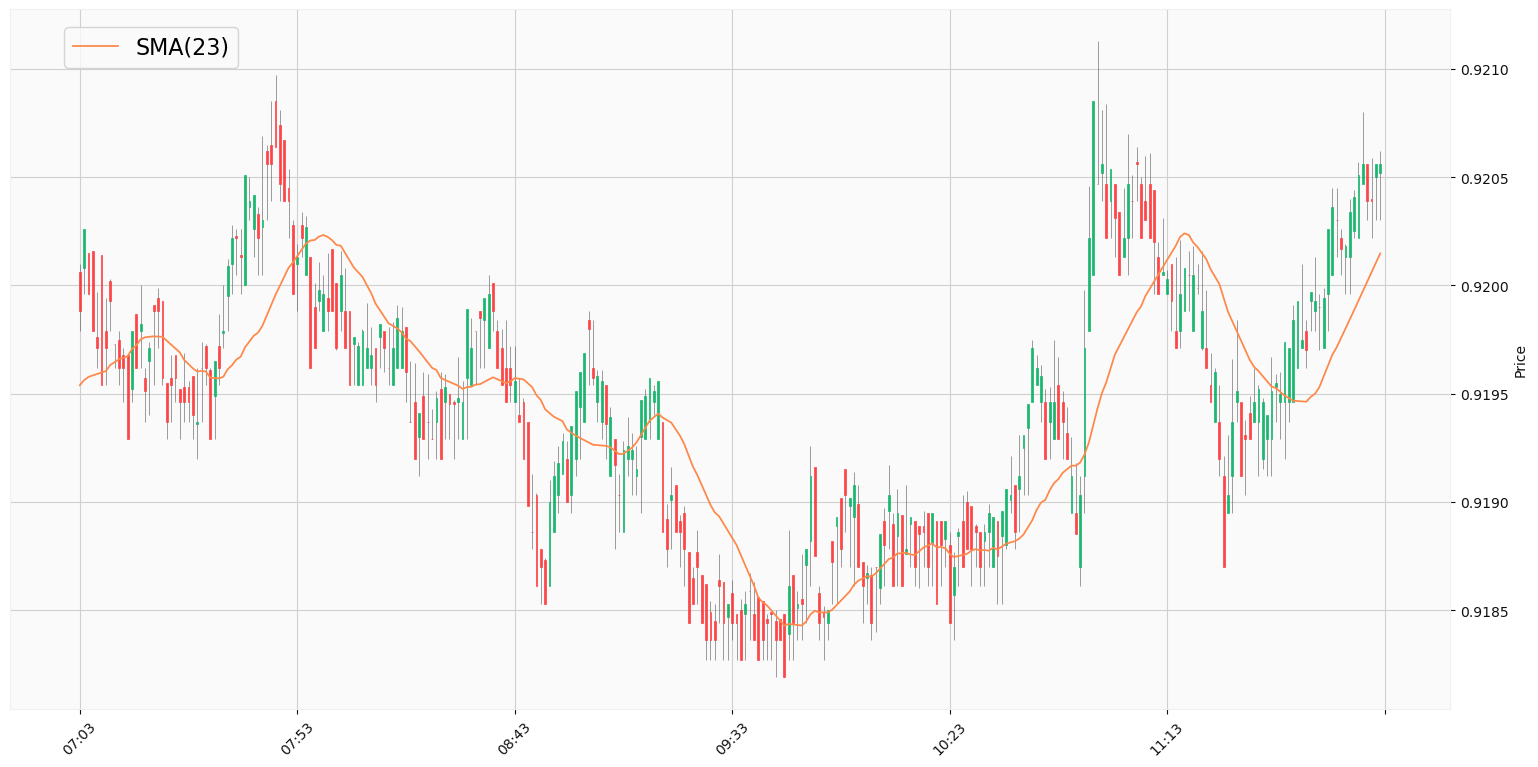

In [24]:
data = {
        'open': df_win23['Apple_OPEN'],
        'high': df_win23['Apple_HIGHT'],
        'low': df_win23['Apple_LOW'],
        'close':df_win23['Apple_CLOSE']
        }
average = {'Average':df_win23['Apple_SMA_w23']}


# Prepare data for candlestick plot
df_data = pd.DataFrame(data)
df_data.reset_index(inplace=True)
df_data['DATE'] = pd.to_datetime(df_data['DATE'])
df_data.set_index('DATE', inplace=True)

df_average = pd.DataFrame(average)

ic = [
     mpf.make_addplot(df_average[700:1000], color = '#FF8849',panel=0,),
]

labels = ["SMA(23)"]

fig, axes = mpf.plot(
    df_data[700:1000],
    type="candle", 
    style="yahoo",
    addplot=ic,
    figsize=(20,10),
    returnfig=True
)

axes[0].legend([None]*(len(ic)+2))
handles = axes[0].get_legend().legend_handles
axes[0].legend(handles=handles[2:], labels=labels, loc="upper left", fontsize='16', bbox_to_anchor=(0.03, 0.99))

### Exponential moving average window 23

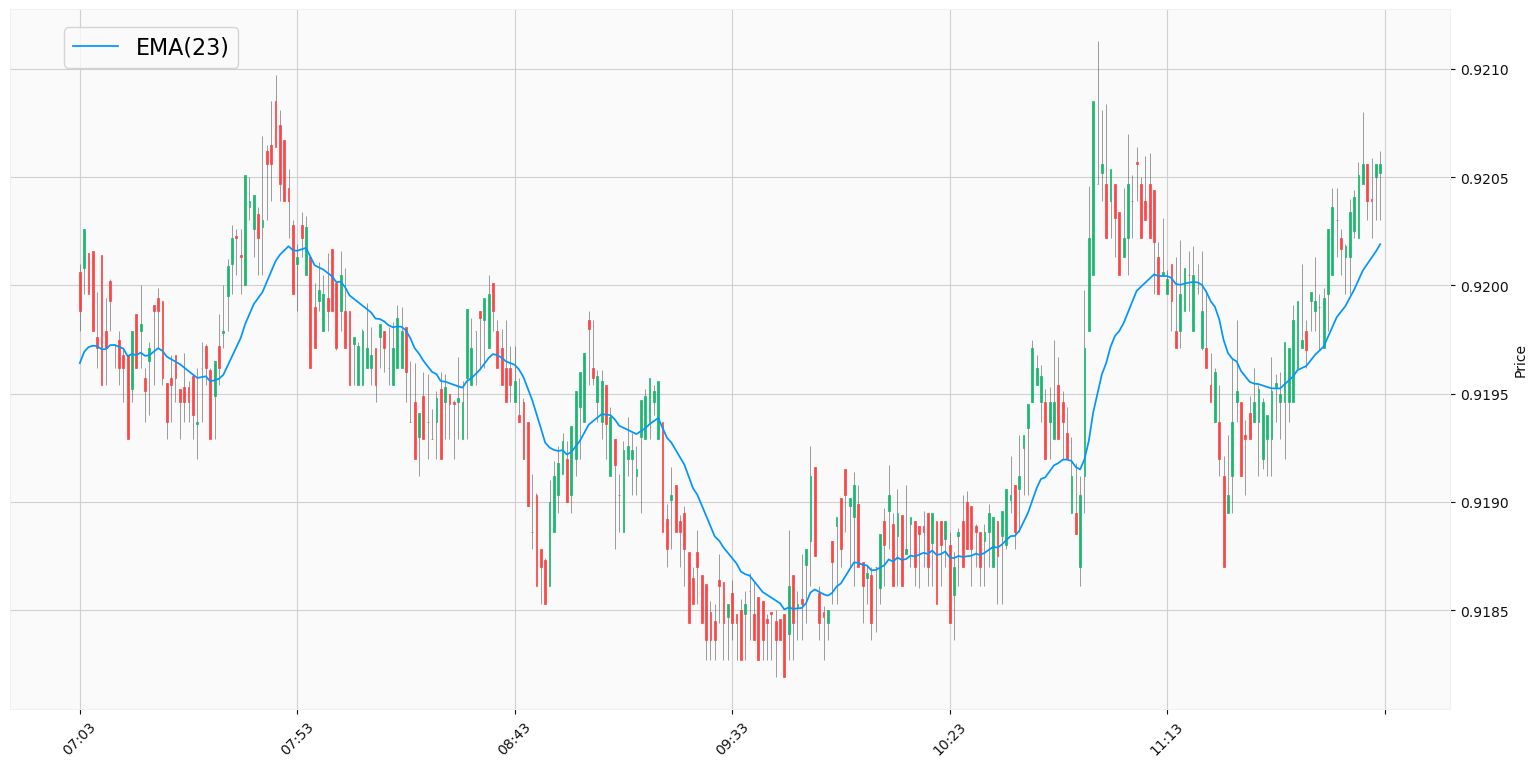

In [25]:
data = {
        'open': df_win23['Apple_OPEN'],
        'high': df_win23['Apple_HIGHT'],
        'low': df_win23['Apple_LOW'],
        'close':df_win23['Apple_CLOSE']
        }

average = {
    'Apple_EMA_w23': df_win23['Apple_EMA_w23']
}

# Prepare data for candlestick plot
df_data = pd.DataFrame(data)
df_data.reset_index(inplace=True)
df_data['DATE'] = pd.to_datetime(df_data['DATE'])
df_data.set_index('DATE', inplace=True)

df_average = pd.DataFrame(average)


ic = [
     mpf.make_addplot(df_average.Apple_EMA_w23[700:1000],color = '#0496ff',panel=0,),
]

labels = ["EMA(23)"]

fig, axes = mpf.plot(
    df_data[700:1000],
    type="candle", 
    style="yahoo",
    addplot=ic,
    figsize=(20,10),
    returnfig=True
)

axes[0].legend([None]*(len(ic)+2))
handles = axes[0].get_legend().legend_handles
axes[0].legend(handles=handles[2:], labels=labels, loc="upper left", fontsize='16', bbox_to_anchor=(0.03, 0.99))

### Weighted moving average window 23

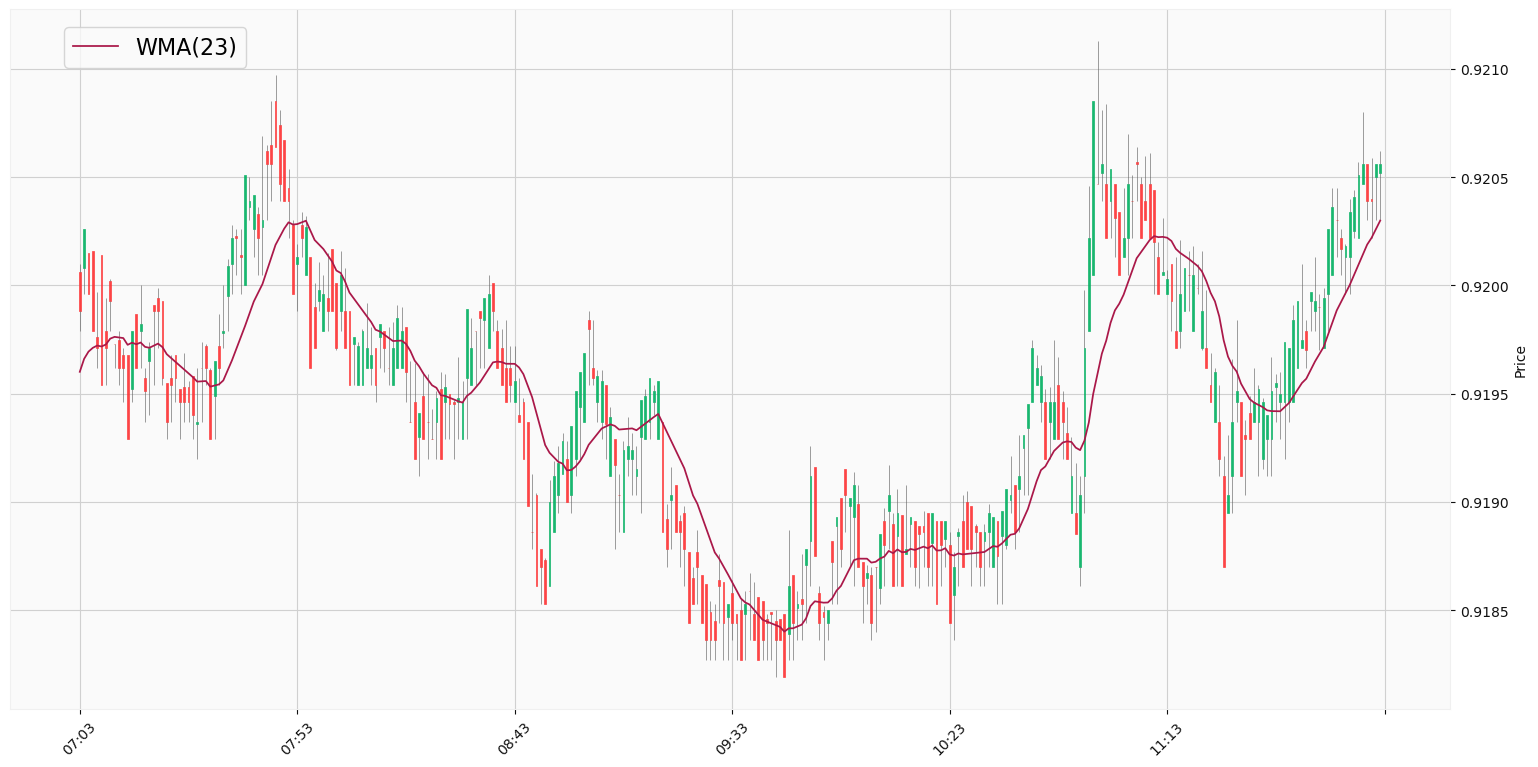

In [26]:
data = {
        'open': df_win23['Apple_OPEN'],
        'high': df_win23['Apple_HIGHT'],
        'low': df_win23['Apple_LOW'],
        'close':df_win23['Apple_CLOSE']
        }
average = {'Average':df_win23['Apple_WMA_w23']}

# Prepare data for candlestick plot
df_data = pd.DataFrame(data)
df_data.reset_index(inplace=True)
df_data['DATE'] = pd.to_datetime(df_data['DATE'])
df_data.set_index('DATE', inplace=True)

df_average = pd.DataFrame(average)


ic = [
     mpf.make_addplot(df_average[700:1000],color = '#AA1849',panel=0,),
]

labels = ["WMA(23)"]

fig, axes = mpf.plot(
    df_data[700:1000],
    type="candle", 
    style="yahoo",
    addplot=ic,
    figsize=(20,10),
    returnfig=True
)

axes[0].legend([None]*(len(ic)+2))
handles = axes[0].get_legend().legend_handles
axes[0].legend(handles=handles[2:], labels=labels, loc="upper left", fontsize='16', bbox_to_anchor=(0.03, 0.99))

### Hull moving average window 23

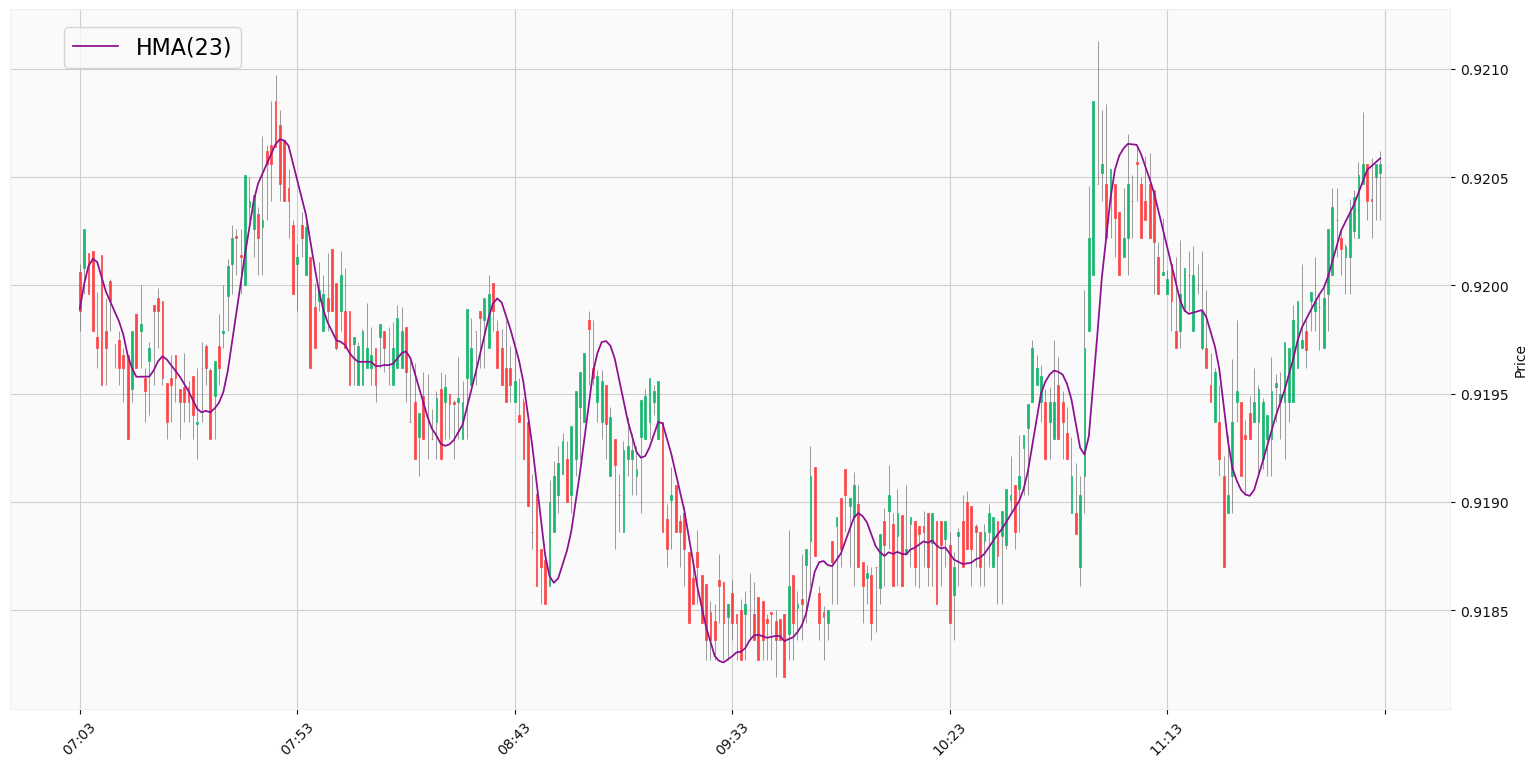

In [27]:
data = {
        'open': df_win23['Apple_OPEN'],
        'high': df_win23['Apple_HIGHT'],
        'low': df_win23['Apple_LOW'],
        'close':df_win23['Apple_CLOSE']
        }
average = {'Average':df_win23['Apple_HMA_w23']}

# Prepare data for candlestick plot
df_data = pd.DataFrame(data)
df_data.reset_index(inplace=True)
df_data['DATE'] = pd.to_datetime(df_data['DATE'])
df_data.set_index('DATE', inplace=True)

df_average = pd.DataFrame(average)


ic = [
     mpf.make_addplot(df_average[700:1000], color = '#8C1091', panel=0,),
]

labels = ["HMA(23)"]

fig, axes = mpf.plot(
    df_data[700:1000],
    type="candle", 
    style="yahoo",
    addplot=ic,
    figsize=(20,10),
    returnfig=True
)

axes[0].legend([None]*(len(ic)+2))
handles = axes[0].get_legend().legend_handles
axes[0].legend(handles=handles[2:], labels=labels, loc="upper left", fontsize='16', bbox_to_anchor=(0.03, 0.99))

### All Moving averages with window size = 23

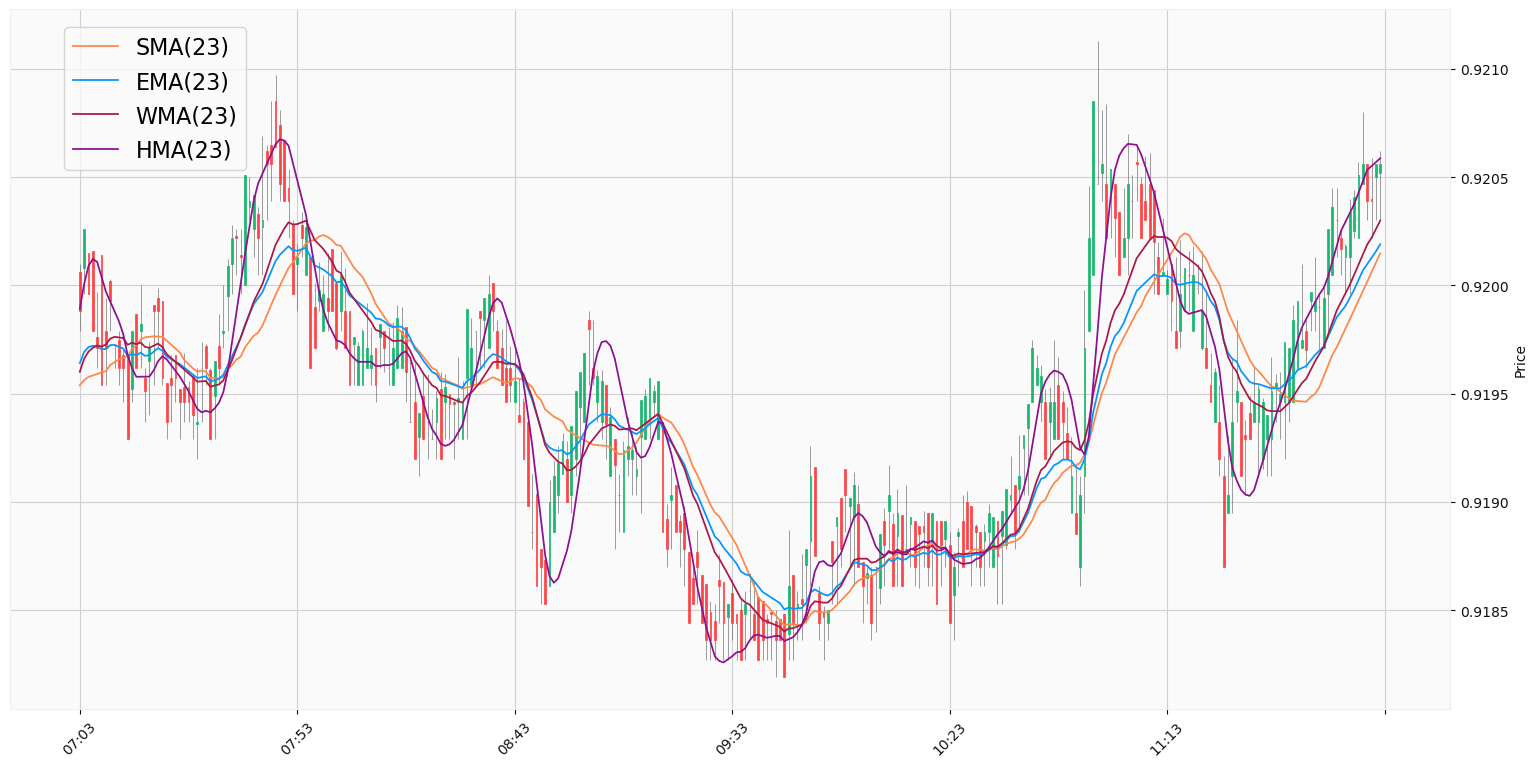

In [28]:
data = {
        'open': df_win23['Apple_OPEN'],
        'high': df_win23['Apple_HIGHT'],
        'low': df_win23['Apple_LOW'],
        'close':df_win23['Apple_CLOSE']
        }

average = {
    'Apple_SMA_w23': df_win23['Apple_SMA_w23'],
    'Apple_EMA_w23': df_win23['Apple_EMA_w23'],
    'Apple_WMA_w23': df_win23['Apple_WMA_w23'],
    'Apple_HMA_w23': df_win23['Apple_HMA_w23'],
}

# Prepare data for candlestick plot
df_data = pd.DataFrame(data)
df_data.reset_index(inplace=True)
df_data['DATE'] = pd.to_datetime(df_data['DATE'])
df_data.set_index('DATE', inplace=True)

df_average = pd.DataFrame(average)


ic = [
     mpf.make_addplot(df_average.Apple_SMA_w23[700:1000], color = '#FF8849', panel=0,),
     mpf.make_addplot(df_average.Apple_EMA_w23[700:1000], color = '#0496ff', panel=0,),
     mpf.make_addplot(df_average.Apple_WMA_w23[700:1000], color = '#AA1849', panel=0,),
     mpf.make_addplot(df_average.Apple_HMA_w23[700:1000], color = '#8C1091', panel=0,),
]

labels = ["SMA(23)", "EMA(23)", "WMA(23)", "HMA(23)"]

fig, axes = mpf.plot(
    df_data[700:1000],
    type="candle", 
    style="yahoo",
    addplot=ic,
    figsize=(20,10),
    returnfig=True
)

axes[0].legend([None]*(len(ic)+2))
handles = axes[0].get_legend().legend_handles
axes[0].legend(handles=handles[2:], labels=labels, loc="upper left", fontsize='16', bbox_to_anchor=(0.03, 0.99))

### Step 4.2: Visualize the Moving averages using window size = 199

### Simple moving average window = 199

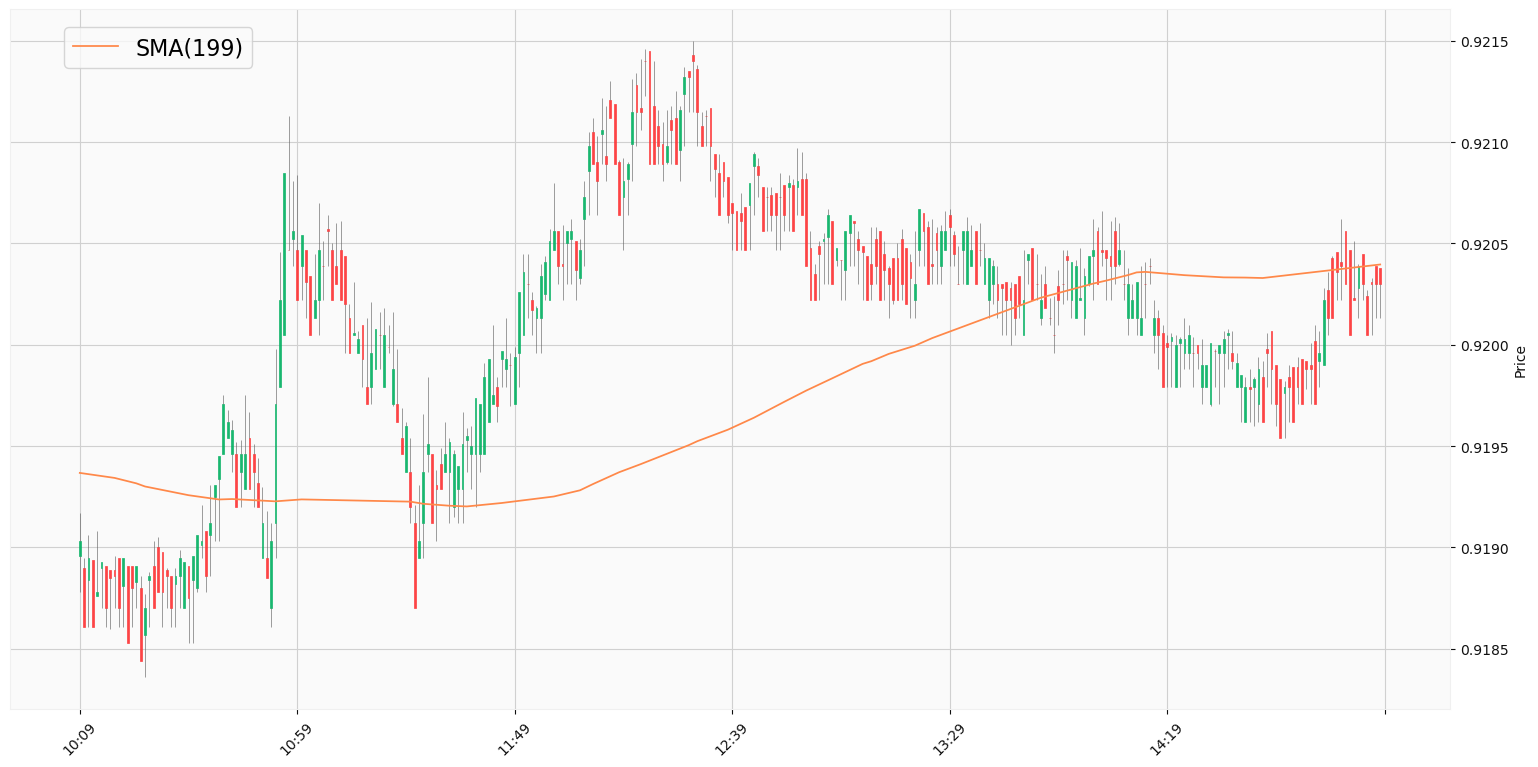

In [29]:
data = {
        'open': df_win199['Apple_OPEN'],
        'high': df_win199['Apple_HIGHT'],
        'low': df_win199['Apple_LOW'],
        'close':df_win199['Apple_CLOSE']
        }

average = {
    'Apple_SMA_w199': df_win199['Apple_SMA_w199'],
}

# Prepare data for candlestick plot
df_data = pd.DataFrame(data)
df_data.reset_index(inplace=True)
df_data['DATE'] = pd.to_datetime(df_data['DATE'])
df_data.set_index('DATE', inplace=True)

df_average = pd.DataFrame(average)


ic = [
     mpf.make_addplot(df_average.Apple_SMA_w199[700:1000],color = '#FF8849',panel=0,),
]

labels = ["SMA(199)"]

fig, axes = mpf.plot(
    df_data[700:1000],
    type="candle", 
    style="yahoo",
    addplot=ic,
    figsize=(20,10),
    returnfig=True
)

axes[0].legend([None]*(len(ic)+2))
handles = axes[0].get_legend().legend_handles
axes[0].legend(handles=handles[2:], labels=labels, loc="upper left", fontsize='16', bbox_to_anchor=(0.03, 0.99))

### Exponential moving average window = 199

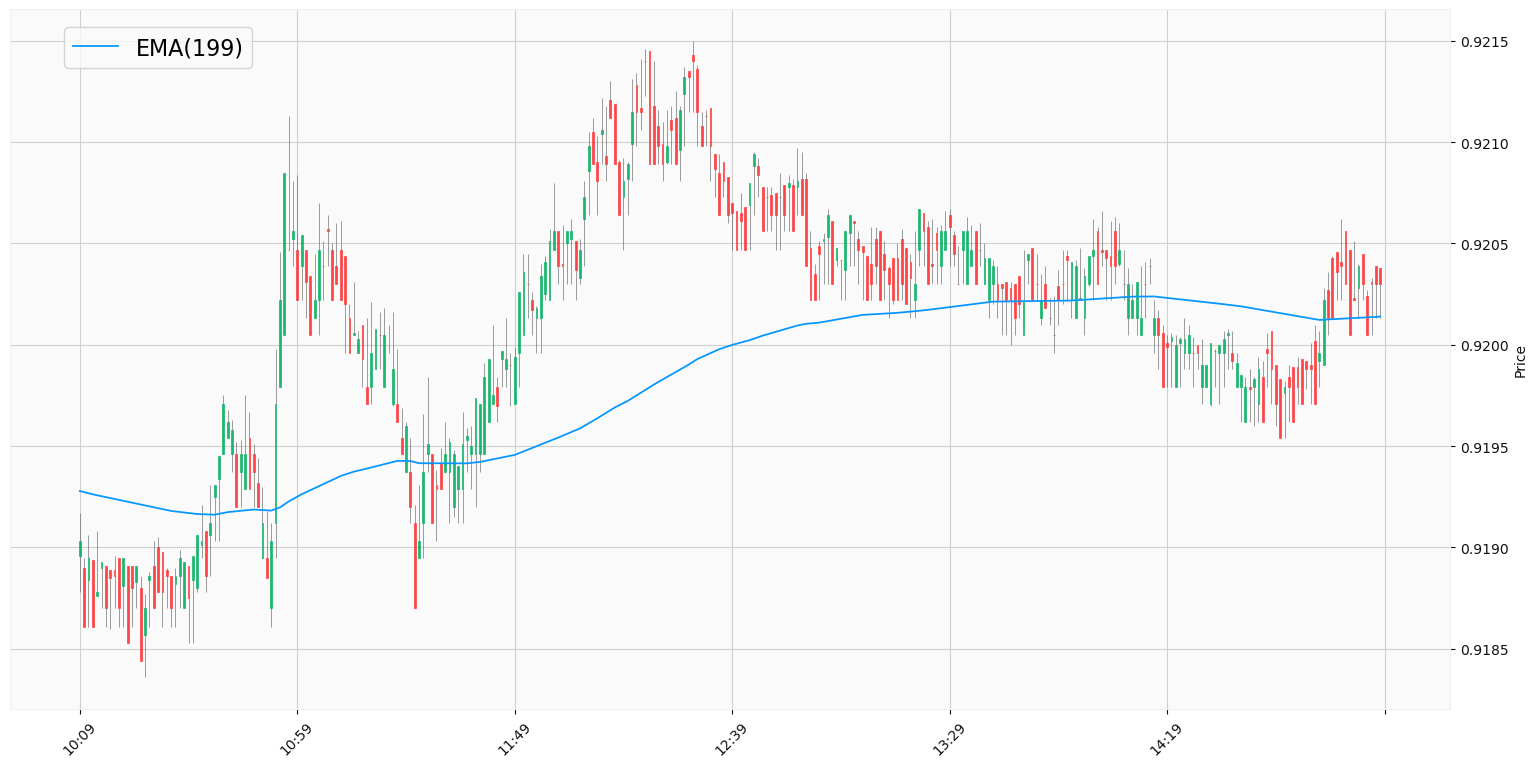

In [30]:
data = {
        'open': df_win199['Apple_OPEN'],
        'high': df_win199['Apple_HIGHT'],
        'low': df_win199['Apple_LOW'],
        'close':df_win199['Apple_CLOSE']
        }

average = {
    'Apple_EMA_w199': df_win199['Apple_EMA_w199'],
}

# Prepare data for candlestick plot
df_data = pd.DataFrame(data)
df_data.reset_index(inplace=True)
df_data['DATE'] = pd.to_datetime(df_data['DATE'])
df_data.set_index('DATE', inplace=True)

df_average = pd.DataFrame(average)


ic = [
     mpf.make_addplot(df_average.Apple_EMA_w199[700:1000],color = '#0496ff',panel=0,),
]

labels = ["EMA(199)"]

fig, axes = mpf.plot(
    df_data[700:1000],
    type="candle", 
    style="yahoo",
    addplot=ic,
    figsize=(20,10),
    returnfig=True
)

axes[0].legend([None]*(len(ic)+2))
handles = axes[0].get_legend().legend_handles
axes[0].legend(handles=handles[2:], labels=labels, loc="upper left", fontsize='16', bbox_to_anchor=(0.03, 0.99))

### Weighted moving average window = 199

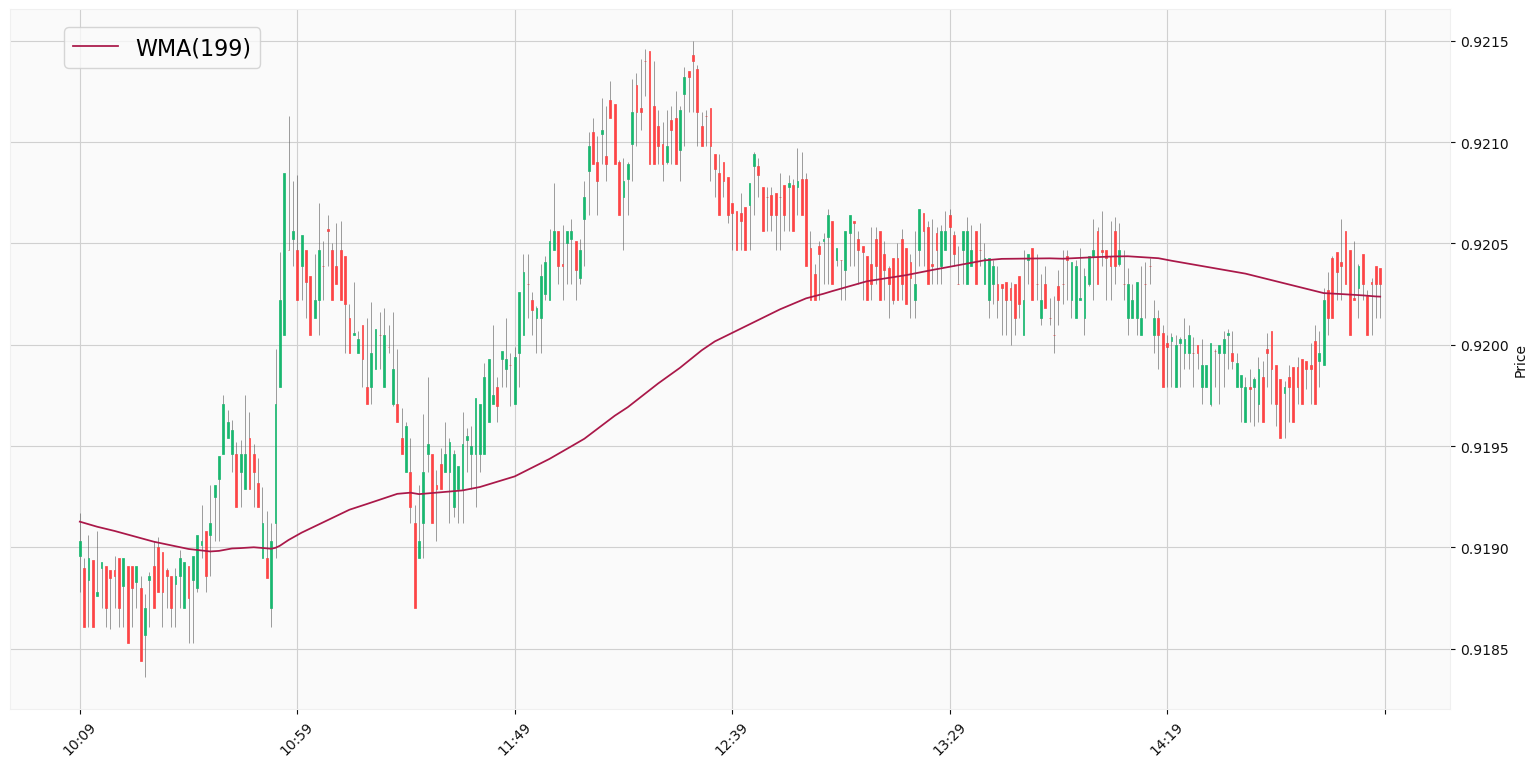

In [31]:
data = {
        'open': df_win199['Apple_OPEN'],
        'high': df_win199['Apple_HIGHT'],
        'low': df_win199['Apple_LOW'],
        'close':df_win199['Apple_CLOSE']
        }

average = {
    'Apple_WMA_w199': df_win199['Apple_WMA_w199']
}

# Prepare data for candlestick plot
df_data = pd.DataFrame(data)
df_data.reset_index(inplace=True)
df_data['DATE'] = pd.to_datetime(df_data['DATE'])
df_data.set_index('DATE', inplace=True)

df_average = pd.DataFrame(average)


ic = [
     mpf.make_addplot(df_average.Apple_WMA_w199[700:1000],color = '#AA1849',panel=0,),
]

labels = ["WMA(199)"]

fig, axes = mpf.plot(
    df_data[700:1000],
    type="candle", 
    style="yahoo",
    addplot=ic,
    figsize=(20,10),
    returnfig=True
)

axes[0].legend([None]*(len(ic)+2))
handles = axes[0].get_legend().legend_handles
axes[0].legend(handles=handles[2:], labels=labels, loc="upper left", fontsize='16', bbox_to_anchor=(0.03, 0.99))

### Hull moving average window 199

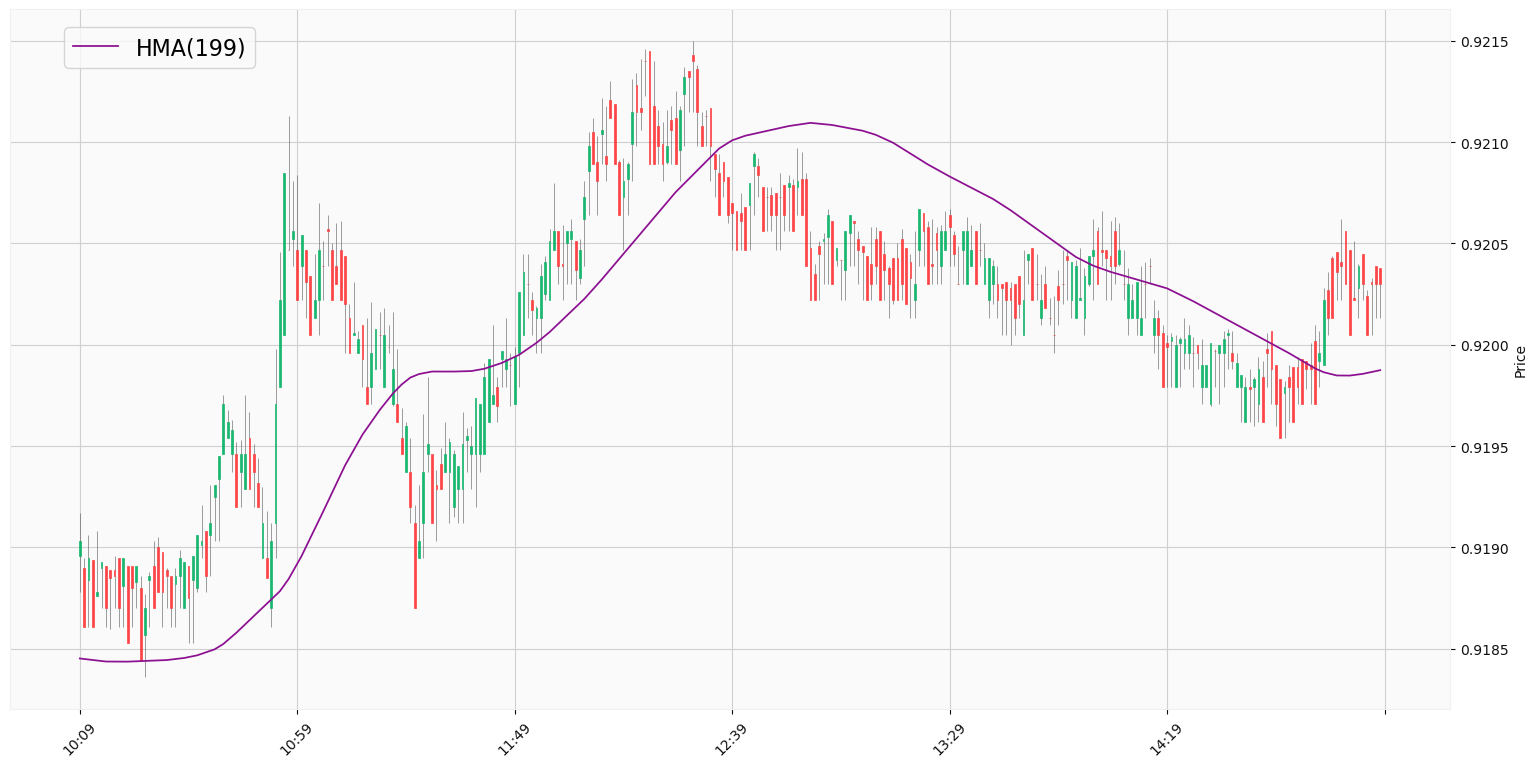

In [32]:
data = {
        'open': df_win199['Apple_OPEN'],
        'high': df_win199['Apple_HIGHT'],
        'low': df_win199['Apple_LOW'],
        'close':df_win199['Apple_CLOSE']
        }

average = {
    'Apple_HMA_w199': df_win199['Apple_HMA_w199']
}

# Prepare data for candlestick plot
df_data = pd.DataFrame(data)
df_data.reset_index(inplace=True)
df_data['DATE'] = pd.to_datetime(df_data['DATE'])
df_data.set_index('DATE', inplace=True)

df_average = pd.DataFrame(average)


ic = [
     mpf.make_addplot(df_average.Apple_HMA_w199[700:1000], color = '#8C1091', panel=0,),
]

labels = ["HMA(199)"]

fig, axes = mpf.plot(
    df_data[700:1000],
    type="candle", 
    style="yahoo",
    addplot=ic,
    figsize=(20,10),
    returnfig=True
)

axes[0].legend([None]*(len(ic)+2))
handles = axes[0].get_legend().legend_handles
axes[0].legend(handles=handles[2:], labels=labels, loc="upper left", fontsize='16', bbox_to_anchor=(0.03, 0.99))

### All Moving averages with window size = 199

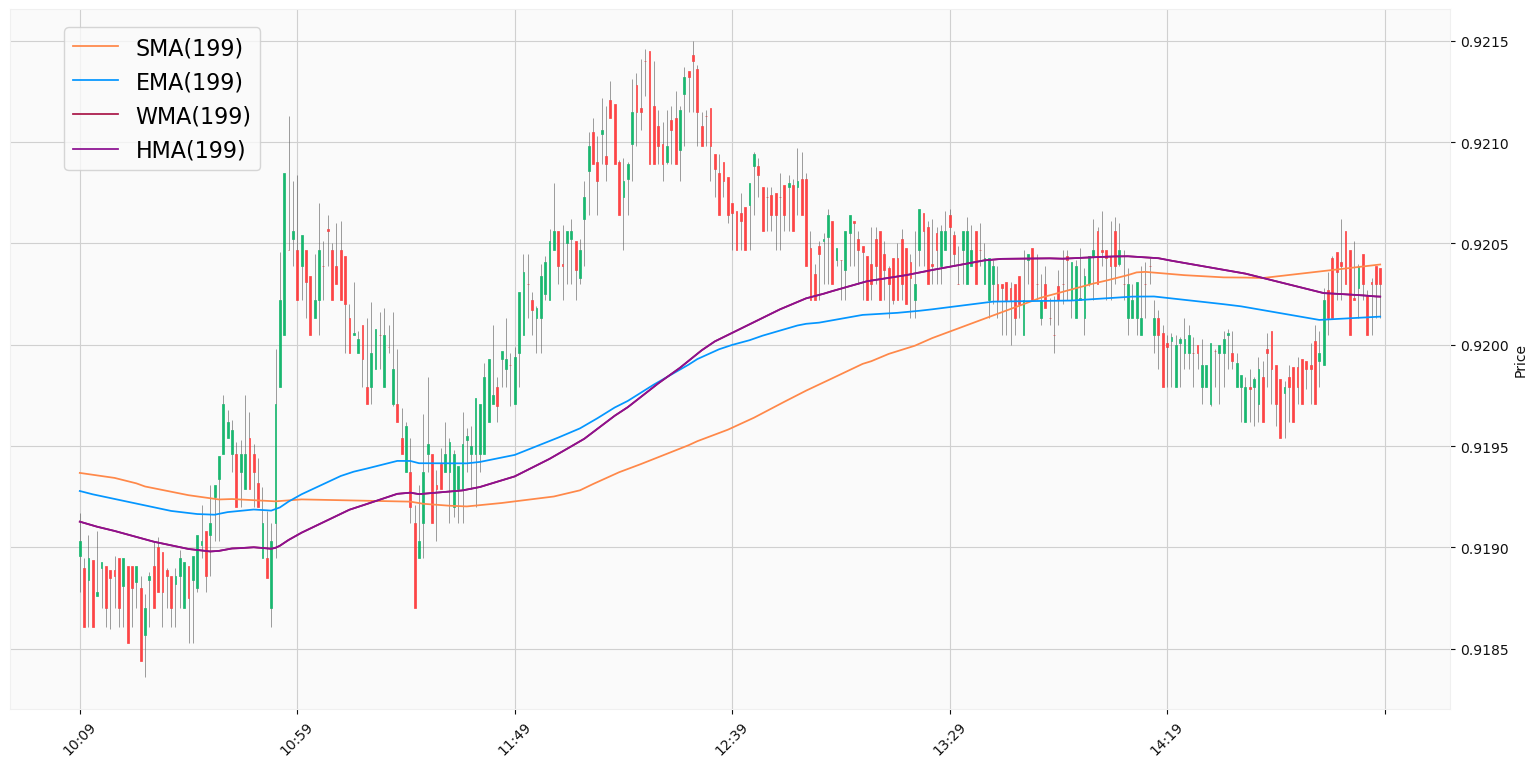

In [33]:
data = {
        'open': df_win199['Apple_OPEN'],
        'high': df_win199['Apple_HIGHT'],
        'low': df_win199['Apple_LOW'],
        'close':df_win199['Apple_CLOSE']
        }

average = {
    'Apple_SMA_w199': df_win199['Apple_SMA_w199'],
    'Apple_EMA_w199': df_win199['Apple_EMA_w199'],
    'Apple_WMA_w199': df_win199['Apple_WMA_w199'],
    'Apple_HMA_w199': df_win199['Apple_HMA_w199'],
}

# Prepare data for candlestick plot
df_data = pd.DataFrame(data)
df_data.reset_index(inplace=True)
df_data['DATE'] = pd.to_datetime(df_data['DATE'])
df_data.set_index('DATE', inplace=True)

df_average = pd.DataFrame(average)


ic = [
     mpf.make_addplot(df_average.Apple_SMA_w199[700:1000],color = '#FF8849',panel=0,),
     mpf.make_addplot(df_average.Apple_EMA_w199[700:1000],color = '#0496ff',panel=0,),
     mpf.make_addplot(df_average.Apple_WMA_w199[700:1000],color = '#AA1849',panel=0,),
     mpf.make_addplot(df_average.Apple_WMA_w199[700:1000],color = '#8C1091',panel=0,),
]

labels = ["SMA(199)", "EMA(199)", "WMA(199)", "HMA(199)"]

fig, axes = mpf.plot(
    df_data[700:1000],
    type="candle", 
    style="yahoo",
    addplot=ic,
    figsize=(20,10),
    returnfig=True
)

axes[0].legend([None]*(len(ic)+2))
handles = axes[0].get_legend().legend_handles
axes[0].legend(handles=handles[2:], labels=labels, loc="upper left", fontsize='16', bbox_to_anchor=(0.03, 0.99))